In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
import sys
sys.path.append('../')
from Util import loadBeerRaw,loadWine,runNNs
X_train, X_test, y_train, y_test= loadBeerRaw()
encoder = LabelEncoder()
X_train['SugarScale'] = encoder.fit_transform(X_train['SugarScale']).astype(np.int32)
style_id_train = X_train[['StyleID']]
X_train=X_train[['OG','FG','ABV','IBU','Color','BoilSize','BoilTime','Efficiency','SugarScale']]
X_test['SugarScale'] = encoder.fit_transform(X_test['SugarScale']).astype(np.int32)
style_id_test = X_test[['StyleID']]
X_test=X_test[['OG','FG','ABV','IBU','Color','BoilSize','BoilTime','Efficiency','SugarScale']]
cols =[]
for x in range(1,6):
    cols.append('principal component ' + str(x))
transformer = PCA(n_components=5)
principalComponents =transformer.fit_transform(X_train)
X_train = pd.DataFrame(data = principalComponents,index=X_train.index
             , columns = cols)
principalComponents = transformer.transform(X_test)
X_test = pd.DataFrame(data = principalComponents,index=X_test.index
             , columns = cols)


y_test =encoder.fit_transform(y_test).astype(np.int32)
y_train=encoder.fit_transform(y_train).astype(np.int32)
num_features = X_train.shape[1]
num_classes = len(encoder.classes_)
X_test.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5
BeerID,,,,,
53355,-19.748678,20.926621,-0.828114,-13.092814,-9.232253
65753,-24.757696,64.599057,-2.497893,-15.329540,-8.492699
59953,-0.908087,11.134461,-8.025180,2.431212,2.523597
19190,0.711633,76.383741,-4.102664,-5.922500,22.538796
41651,1.869295,22.657037,-6.075119,-3.377600,-2.684543


In [11]:
X_train['StyleID'] = style_id_train
kmeans = KMeans(n_clusters=8, random_state=0)
kmeans.fit(X_train)
y_kmeans = kmeans.predict(X_train)
X_train=X_train.drop(columns='StyleID')
# with Clusters
X_train_with_Cluster=X_train.copy()
X_train_with_Cluster["Cluster"] = y_kmeans
X_test['StyleID'] = style_id_test
y_kmeans = kmeans.predict(X_test)
X_test=X_test.drop(columns='StyleID')
X_test_with_Cluster=X_test.copy()
X_test_with_Cluster["Cluster"]=y_kmeans

C:\ProgramData\Anaconda3\lib\site-packages\nolearn\lasagne\base.py:370: UserWarning: The 'eval_size' argument has been deprecated, please use the 'train_split' parameter instead, e.g.
train_split=TrainSplit(eval_size=0.4)
  warn("The 'eval_size' argument has been deprecated, please use "
C:\ProgramData\Anaconda3\lib\site-packages\nolearn\lasagne\base.py:370: UserWarning: The 'eval_size' argument has been deprecated, please use the 'train_split' parameter instead, e.g.
train_split=TrainSplit(eval_size=0.4)
  warn("The 'eval_size' argument has been deprecated, please use "


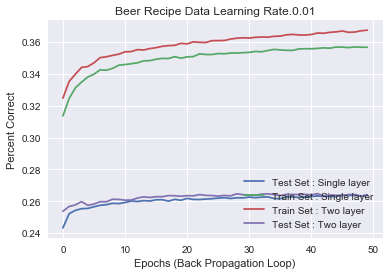

In [12]:
learningRates=[.01]
for i in learningRates:
    runNNs(X_train_with_Cluster, X_test_with_Cluster, y_train, y_test,num_classes,num_features+1,"Beer Recipe Data Learning Rate.",50,i)

C:\ProgramData\Anaconda3\lib\site-packages\nolearn\lasagne\base.py:370: UserWarning: The 'eval_size' argument has been deprecated, please use the 'train_split' parameter instead, e.g.
train_split=TrainSplit(eval_size=0.4)
  warn("The 'eval_size' argument has been deprecated, please use "
C:\ProgramData\Anaconda3\lib\site-packages\nolearn\lasagne\base.py:370: UserWarning: The 'eval_size' argument has been deprecated, please use the 'train_split' parameter instead, e.g.
train_split=TrainSplit(eval_size=0.4)
  warn("The 'eval_size' argument has been deprecated, please use "


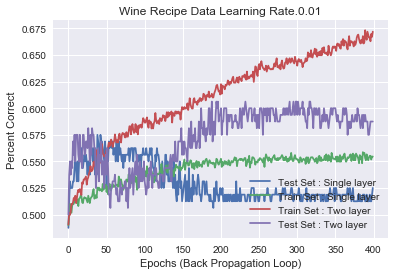

In [15]:
X_train, X_test, y_train, y_test= loadWine()
transformer = PCA(n_components=4)
principalComponents =transformer.fit_transform(X_train)
X_train = pd.DataFrame(data = principalComponents,index=X_train.index
             , columns = ['PCA component 1', 'PCA component 2','PCA component 3','PCA component 4'])
principalComponents = transformer.transform(X_test)
X_test = pd.DataFrame(data = principalComponents,index=X_test.index
             , columns = ['PCA component 1', 'PCA component 2','PCA component 3','PCA component 4'])

num_features = X_train.shape[1]
num_classes = 10

kmeans = KMeans(n_clusters=6, random_state=0)
kmeans.fit(X_train)
y_kmeans = kmeans.predict(X_train)
# with Clusters
X_train_with_Cluster=X_train.copy()
X_train_with_Cluster["Cluster"] = y_kmeans
y_kmeans = kmeans.predict(X_test)
X_test_with_Cluster=X_test.copy()
X_test_with_Cluster["Cluster"]=y_kmeans


learningRates=[.01]
for i in learningRates:
    runNNs(X_train_with_Cluster, X_test_with_Cluster, y_train, y_test,num_classes,num_features+1,"Wine Recipe Data Learning Rate.",400,i)